In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches


In [79]:
excel_file = r'C:\Users\shubh\OneDrive\Desktop\DS_py_assignment.xlsx'


In [80]:
df = pd.read_excel(excel_file, sheet_name='Data')

In [81]:
numeric_data = data.select_dtypes(include=['number'])


In [91]:
constant_columns = [col for col in numeric_data.columns if numeric_data[col].nunique() == 1]
if constant_columns:
    print(f"Constant columns detected: {constant_columns}")
    numeric_data = numeric_data.drop(columns=constant_columns)


Constant columns detected: ['MARRIED', 'CHILDREN', '7-Cost Only Spend']


In [92]:
numeric_data_cleaned = numeric_data.dropna()

Cleaned data after removing constant columns and NaN values:
         CUSTOMERID     LCPCOUNT  TENURE_IN_MONTHS  CLOSESTSTOREDISTANCE  \
count   4008.000000  4008.000000       4008.000000           4008.000000   
mean   10087.613523     1.388473         72.248503             19.409586   
std     2864.244830     2.445419         80.592203             39.176839   
min     5008.000000     0.000000         -9.000000              0.197164   
25%     7634.500000     0.000000         13.000000              4.771603   
50%    10128.000000     1.000000         37.000000              8.626998   
75%    12537.500000     2.000000        121.000000             18.572875   
max    14997.000000    75.000000        284.000000           1436.547873   

           FEMALE          AGE   HS_DIPLOMA  SOME_COLLEGE  BACH_GRAD_DEG  \
count  4008.00000  4008.000000  4008.000000   4008.000000    4008.000000   
mean      0.38523    47.206836     0.240519      0.330339       0.354042   
std       0.48671    15.31

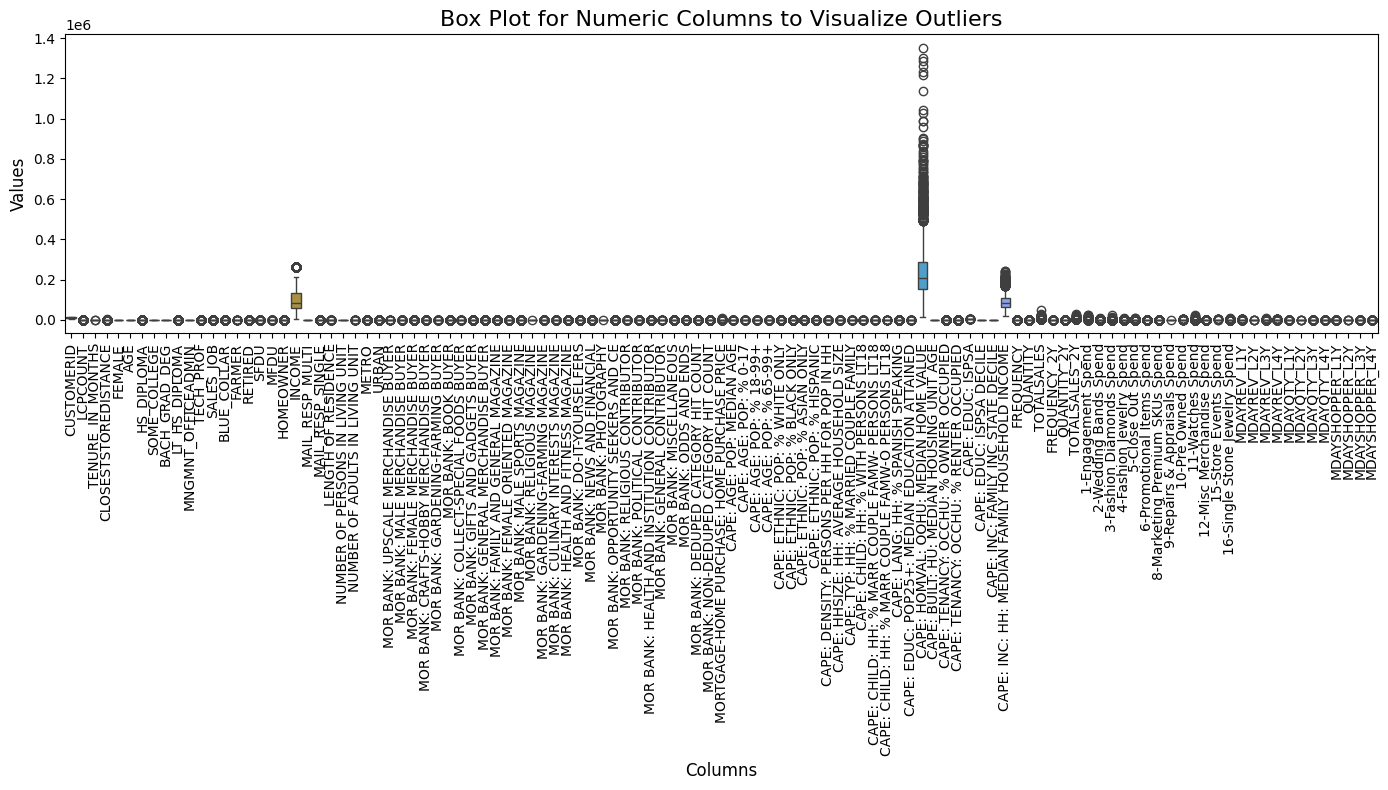

In [96]:
if numeric_data_cleaned.empty:
    print("Warning: The data after cleaning has no numeric columns with enough variation.")
else:
    print("Cleaned data after removing constant columns and NaN values:")
    print(numeric_data_cleaned.describe())

    
    plt.figure(figsize=(14, 8))  
    sns.boxplot(data=numeric_data_cleaned)

    # Add title and labels
    plt.title('Box Plot for Numeric Columns to Visualize Outliers', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Values', fontsize=12)


    plot_file = "box_plot.png"
    plt.xticks(rotation=90)  
    plt.tight_layout()  
    plt.savefig(plot_file, dpi=100)  

<Axes: >

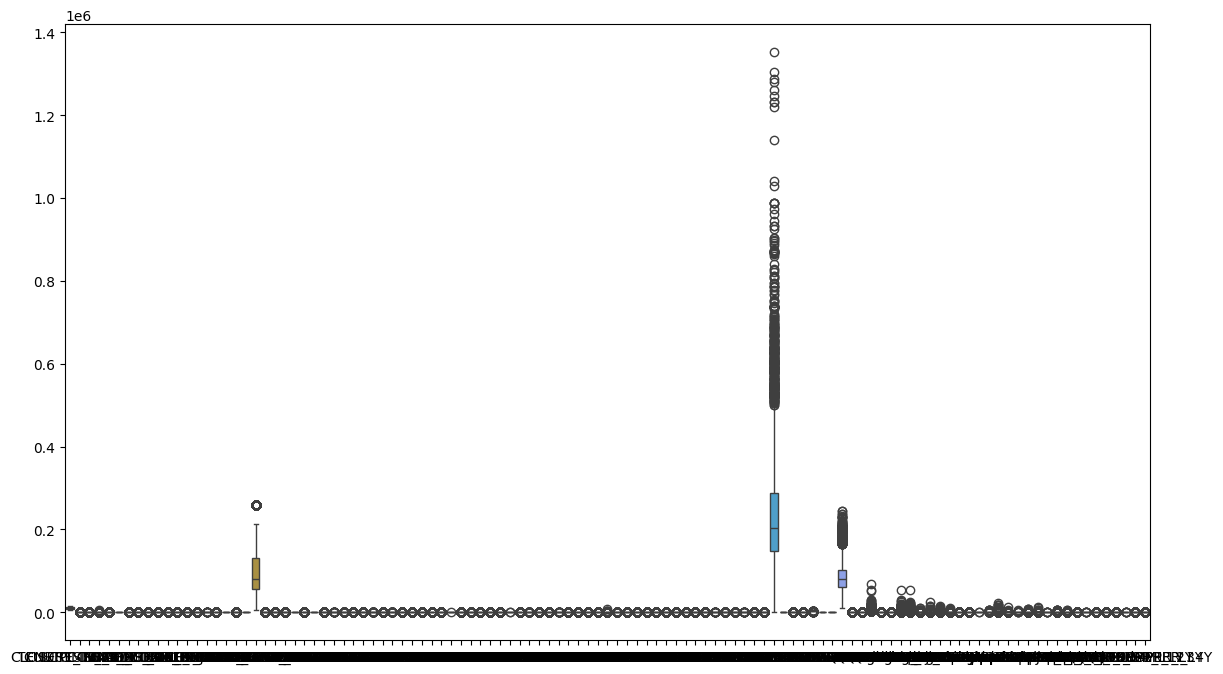

In [97]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=numeric_data)


In [98]:
doc = Document()


In [99]:
doc.add_heading('Box Plot Report - Outliers Visualization', level=1)


In [100]:
doc.add_heading('Box Plot for Numeric Columns:', level=2)
doc.add_picture(plot_file, width=Inches(6))

In [101]:
doc_file = "box_plot_report.docx"
doc.save(doc_file)

In [102]:
print(f"Word report with box plot generated successfully: {doc_file}")

Word report with box plot generated successfully: box_plot_report.docx
